# Learning Jax

In [11]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

key = random.key(0)
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## SVM Example
https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html

In [12]:
def sigmoid(x):
    return 0.5 * (jnp.tanh(x / 2) + 1)

# Outputs probability of a label being true.
def predict(W, b, inputs):
    return sigmoid(jnp.dot(inputs, W) + b)

# Build a toy dataset.
inputs = jnp.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = jnp.array([True, True, False, True])
def loss(W, b):
    preds = predict(W, b, inputs)
    label_probs = preds * targets + (1 - preds) * (1 - targets)
    return -jnp.sum(jnp.log(label_probs))
key, W_key, b_key = random.split(key, 3)
W = random.normal(W_key, (3,))
b = random.normal(b_key, ())

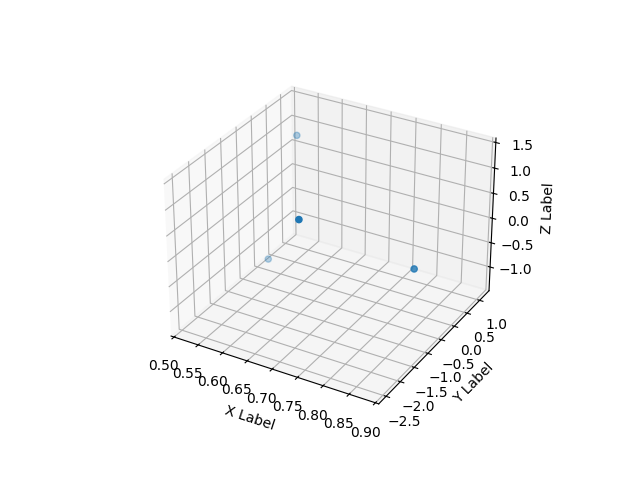

In [13]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inputs[:,0], inputs[:,1], inputs[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [14]:
# Differentiate `loss` with respect to the first positional argument:
W_grad = grad(loss, argnums=0)(W, b)
print('W_grad', W_grad)
# Since argnums=0 is the default, this does the same thing:
W_grad = grad(loss)(W, b)
print('W_grad', W_grad)

# But we can choose different values too, and drop the keyword:
b_grad = grad(loss, 1)(W, b)
print('b_grad', b_grad)

# Including tuple values
W_grad, b_grad = grad(loss, (0, 1))(W, b)
print('W_grad', W_grad)
print('b_grad', b_grad)

W_grad [-0.16965583 -0.8774647  -1.4901344 ]
W_grad [-0.16965583 -0.8774647  -1.4901344 ]
b_grad -0.29227245
W_grad [-0.16965583 -0.8774647  -1.4901344 ]
b_grad -0.29227245


In [20]:

W = random.normal(W_key, (3,))
b = random.normal(b_key, ())
lr = .2
for i in range(20): # grad descent
  dW,db = grad(loss, (0,1))(W,b)
  W -= lr*dW
  b -= lr*db
  print(f"{i}: Loss:{loss(W,b)}")

0: Loss:2.4582903385162354
1: Loss:1.9727628231048584
2: Loss:1.591786503791809
3: Loss:1.302208423614502
4: Loss:1.0853173732757568
5: Loss:0.9225443601608276
6: Loss:0.798774003982544
7: Loss:0.702918529510498
8: Loss:0.6272069215774536
9: Loss:0.56625896692276
10: Loss:0.5163301229476929
11: Loss:0.4747796654701233
12: Loss:0.4397128224372864
13: Loss:0.40974655747413635
14: Loss:0.3838537633419037
15: Loss:0.36125901341438293
16: Loss:0.3413677215576172
17: Loss:0.32371801137924194
18: Loss:0.3079458177089691
19: Loss:0.29376164078712463


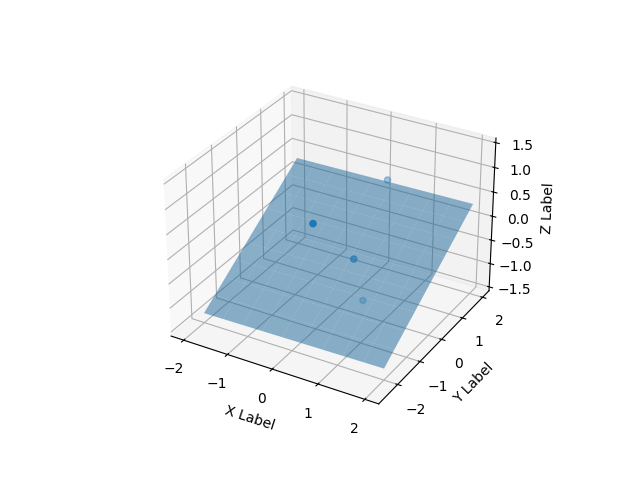

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inputs[:,0], inputs[:,1], inputs[:,2])
xx,yy = jnp.meshgrid(jnp.linspace(-2,2,10),jnp.linspace(-2,2,10))
z = (-b - W[0]*xx -W[1]*yy)/W[2]

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.plot_surface(xx,yy,z,alpha=.5)

In [22]:
from jax import jvp

# Isolate the function from the weight matrix to the predictions
f = lambda W: predict(W, b, inputs)

key, subkey = random.split(key)
v = random.normal(subkey, W.shape)

# Push forward the vector `v` along `f` evaluated at `W`
y, u = jvp(f, (W,), (v,))

In [24]:
print(y)
print(u)

[0.8936567  0.9457077  0.11745864 0.99944353]
[ 0.01564094  0.07783092 -0.00245371  0.00147053]


### Pushforward (JVP) and Pullback (VJP)